# Mid-term project

## Data preparation

In [163]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [164]:
#data = 'https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/download?datasetVersionNumber=1'
#!wget $data

In [165]:
df = pd.read_csv('creditcard_2023.csv')
df.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
V1,-0.260648,0.985100,-0.260272,-0.152152,-0.206820
V2,-0.469648,-0.356045,-0.949385,-0.508959,-0.165280
V3,2.496266,0.558056,1.728538,1.746840,1.527053
V4,-0.083724,-0.429654,-0.457986,-1.090178,-0.448293
V5,0.129681,0.277140,0.074062,0.249486,0.106125
V6,0.732898,0.428605,1.419481,1.143312,0.530549
V7,0.519014,0.406466,0.743511,0.518269,0.658849
V8,-0.130006,-0.133118,-0.095576,-0.065130,-0.212660
V9,0.727159,0.347452,-0.261297,-0.205698,1.049921


In [166]:
df.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

In [167]:
df.columns = df.columns.str.lower()
df = df.drop('id', axis = 1)

In [168]:
df = df.rename(columns={'class': 'is_fraud'})
df.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'is_fraud'],
      dtype='object')

# Exploratory data analysis

In [169]:
columns_null_sum = df.isnull().sum()
columns_null_sum[columns_null_sum > 0].index

Index([], dtype='object')

In [170]:
df.is_fraud.value_counts()

is_fraud
0    284315
1    284315
Name: count, dtype: int64

In [171]:
global_mean = df.is_fraud.mean()
round(global_mean, 3)

0.5

# Splitting the data

In [172]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
len(df), len(df_train_full), (len(df_train_full)/len(df))*100, len(df_test), (len(df_test)/len(df))*100

(568630, 454904, 80.0, 113726, 20.0)

In [173]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
len(df), len(df_train), (len(df_train)/len(df))*100, len(df_val), (len(df_val)/len(df))*100, len(df_test), (len(df_test)/len(df))*100

(568630, 341178, 60.0, 113726, 20.0, 113726, 20.0)

In [174]:
y_train = df_train.is_fraud.values
y_val = df_val.is_fraud.values

In [175]:
del df_train['is_fraud']
del df_val['is_fraud']

# Correlation

In [176]:
correlation_matrix = df_train_full.corrwith(df_train_full.is_fraud).to_frame('correlation')

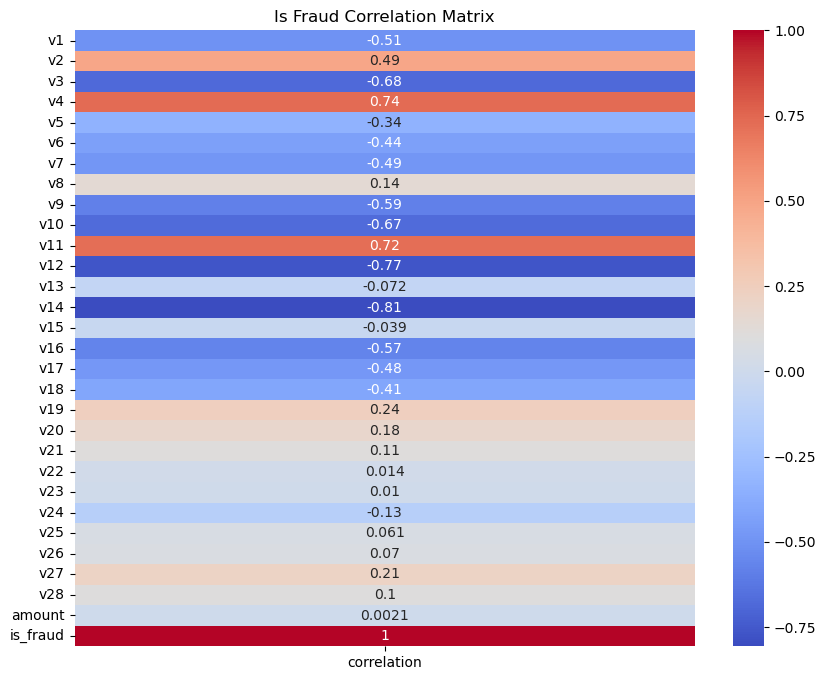

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Is Fraud Correlation Matrix')
plt.show()

# Mean

In [178]:
mean = df_train_full.groupby(by='is_fraud').mean()
mean

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,0.506493,-0.492997,0.681480,-0.735697,0.339280,0.435029,0.491584,-0.144495,0.584940,0.673829,...,-0.179735,-0.109516,-0.014585,-0.010171,0.130881,-0.060797,-0.069856,-0.213475,-0.101990,12028.534067
1,-0.505029,0.491747,-0.682051,0.735775,-0.337225,-0.434356,-0.490558,0.142849,-0.585477,-0.673602,...,0.178042,0.109863,0.014028,0.010105,-0.131115,0.061252,0.069673,0.212512,0.101941,12058.261051


# One-hot encoding

In [179]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train.to_dict(orient='records')
train_dict[0]

{'v1': 1.3403492111079265,
 'v2': -0.2040077349430241,
 'v3': 0.4698086882933029,
 'v4': 0.5951459204165094,
 'v5': 0.3598243185358687,
 'v6': 0.3901674673239657,
 'v7': 0.4254980072260002,
 'v8': -0.1766865607080249,
 'v9': 0.926226959846178,
 'v10': 0.7866131518486817,
 'v11': -0.5059766730447682,
 'v12': -0.3399202871372723,
 'v13': 1.5709792523020525,
 'v14': 1.2461566307074206,
 'v15': -1.3010873884093146,
 'v16': 0.966410210493975,
 'v17': 0.7673550047002093,
 'v18': 0.2357896336349743,
 'v19': -1.7262871190047528,
 'v20': -0.467981359932954,
 'v21': -0.214614899133819,
 'v22': -0.4307775552526642,
 'v23': 0.1431099735733737,
 'v24': -0.0817861866438306,
 'v25': 0.0104500391522079,
 'v26': -0.2802390531651622,
 'v27': -0.2660599196699356,
 'v28': -0.1218035905730519,
 'amount': 11363.35}

In [180]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [181]:
X_train = dv.transform(train_dict)

In [182]:
X_train.shape

(341178, 29)

In [183]:
dv.get_feature_names_out()

array(['amount', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16',
       'v17', 'v18', 'v19', 'v2', 'v20', 'v21', 'v22', 'v23', 'v24',
       'v25', 'v26', 'v27', 'v28', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
       'v9'], dtype=object)

## Training logistic regression

In [184]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [185]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [186]:
np.set_printoptions(suppress=True)
model.predict_proba(X_val)

array([[0.07119128, 0.92880872],
       [0.        , 1.        ],
       [0.80717658, 0.19282342],
       ...,
       [0.00000008, 0.99999992],
       [0.99952283, 0.00047717],
       [0.        , 1.        ]])

In [187]:
y_pred = model.predict_proba(X_val)[:, 1]

In [188]:
len(y_pred), len(y_pred[y_pred > 0.5])

(113726, 54954)

In [189]:
is_fraud = y_pred > 0.5

In [190]:
(y_val == is_fraud).mean()

0.9646958479151645

## Model interpretation

In [191]:
model.intercept_[0]

8.644528395563498

In [192]:
np.set_printoptions(suppress=True)
model.predict_proba(X_val)

array([[0.07119128, 0.92880872],
       [0.        , 1.        ],
       [0.80717658, 0.19282342],
       ...,
       [0.00000008, 0.99999992],
       [0.99952283, 0.00047717],
       [0.        , 1.        ]])

In [193]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'amount': -0.0,
 'v1': -0.641,
 'v10': -1.815,
 'v11': 1.825,
 'v12': -2.733,
 'v13': 0.015,
 'v14': -3.266,
 'v15': -0.243,
 'v16': -0.838,
 'v17': -1.822,
 'v18': -0.9,
 'v19': -0.099,
 'v2': 0.139,
 'v20': 0.124,
 'v21': 0.26,
 'v22': 0.428,
 'v23': -0.323,
 'v24': -0.167,
 'v25': 0.153,
 'v26': -0.106,
 'v27': 0.189,
 'v28': 0.157,
 'v3': -1.119,
 'v4': 3.521,
 'v5': -0.01,
 'v6': -0.469,
 'v7': -1.022,
 'v8': -2.794,
 'v9': -0.461}

## Small model with greater correlation and correlation indexes values for features

In [194]:
correlation_matrix = df_train_full.corrwith(df_train_full.is_fraud).to_frame('correlation')

correlation_matrix = correlation_matrix[correlation_matrix['correlation'] > 0]
correlation_matrix = correlation_matrix.sort_values(by='correlation', ascending=True)


,correlation
amount,0.002147
v23,0.010115
v22,0.014323
v25,0.061033
v26,0.069769
v28,0.101438
v21,0.109937
v8,0.144033
v20,0.178827
v27,0.212225


In [195]:
features_coef = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))
sorted_items = sorted(features_coef.items(), key=lambda x: x[1])
ordered_dict = dict(sorted_items)


{'v14': -3.266,
 'v8': -2.794,
 'v12': -2.733,
 'v17': -1.822,
 'v10': -1.815,
 'v3': -1.119,
 'v7': -1.022,
 'v18': -0.9,
 'v16': -0.838,
 'v1': -0.641,
 'v6': -0.469,
 'v9': -0.461,
 'v23': -0.323,
 'v15': -0.243,
 'v24': -0.167,
 'v26': -0.106,
 'v19': -0.099,
 'v5': -0.01,
 'amount': -0.0,
 'v13': 0.015,
 'v20': 0.124,
 'v2': 0.139,
 'v25': 0.153,
 'v28': 0.157,
 'v27': 0.189,
 'v21': 0.26,
 'v22': 0.428,
 'v11': 1.825,
 'v4': 3.521}

In [196]:
model_small_columns = ['v13', 'v20', 'v2', 'v25', 'v28', 'v27', 'v21', 'v22', 'v11', 'v4', 'v23', 'v26', 'v8', 'v19']
small_df_train = df_train[model_small_columns]
small_df_val = df_val[model_small_columns]


In [197]:
small_train_dict = small_df_train.to_dict(orient='records')
small_train_dict[0]

{'v13': 1.5709792523020525,
 'v20': -0.467981359932954,
 'v2': -0.2040077349430241,
 'v25': 0.0104500391522079,
 'v28': -0.1218035905730519,
 'v27': -0.2660599196699356,
 'v21': -0.214614899133819,
 'v22': -0.4307775552526642,
 'v11': -0.5059766730447682,
 'v4': 0.5951459204165094,
 'v23': 0.1431099735733737,
 'v26': -0.2802390531651622,
 'v8': -0.1766865607080249,
 'v19': -1.7262871190047528}

In [198]:
small_dv = DictVectorizer(sparse=False)
small_dv.fit(small_train_dict)

DictVectorizer(sparse=False)

In [199]:
X_small_train = small_dv.transform(small_train_dict)
X_small_train.shape

(341178, 14)

In [200]:
small_dv.get_feature_names_out()

array(['v11', 'v13', 'v19', 'v2', 'v20', 'v21', 'v22', 'v23', 'v25',
       'v26', 'v27', 'v28', 'v4', 'v8'], dtype=object)

In [201]:
small_model = LogisticRegression(solver='liblinear', random_state=1)
small_model.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [202]:
small_val_dict = small_df_val[model_small_columns].to_dict(orient='records')
X_small_val = small_dv.transform(small_val_dict)


In [203]:
small_model.predict_proba(X_small_val)

array([[0.27518486, 0.72481514],
       [0.00634826, 0.99365174],
       [0.98315511, 0.01684489],
       ...,
       [0.01101896, 0.98898104],
       [0.99684363, 0.00315637],
       [0.09842416, 0.90157584]])

In [204]:
y_small_pred = small_model.predict_proba(X_small_val)[:, 1]
y_small_pred

array([0.72481514, 0.99365174, 0.01684489, ..., 0.98898104, 0.00315637,
       0.90157584])

In [205]:
is_fraud = y_small_pred > 0.5
(y_val == is_fraud).mean()

0.9254524031443997

## Using the model

In [209]:
transaction = {
    'v1':	-0.260648,
    'v2':	-0.469648,
    'v3':	2.496266 ,
    'v4':	-0.083724,
    'v5':	0.129681 ,
    'v6':	0.732898 ,
    'v7':	0.519014 ,
    'v8':	-0.130006,
    'v9':	0.727159 ,
    'v10':	0.637735 ,
    'v11':	-0.987020,
    'v12':	0.293438 ,
    'v13':	-0.941386,
    'v14':	0.549020 ,
    'v15':	1.804879 ,
    'v16':	0.215598 ,
    'v17':	0.512307 ,
    'v18':	0.333644 ,
    'v19':	0.124270 ,
    'v20':	0.091202 ,
    'v21':	-0.110552,
    'v22':	0.217606 ,
    'v23':	-0.134794,
    'v24':	0.165959 ,
    'v25':	0.126280 ,
    'v26':	-0.434824,
    'v27':	-0.081230,
    'v28':	-0.151045,
    'amount':	17982.10
}

In [210]:
X_test = dv.transform([transaction])
model.predict_proba(X_test)[0, 1]

0.07450897649061311

In [216]:
df_test = df_test.reset_index(drop=True)
df_test


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,is_fraud
0,0.336500,-0.003582,-0.080244,0.653870,-0.142854,0.254843,-0.219874,0.033482,-0.304848,-0.218019,...,0.048555,-0.228407,-0.213986,-0.256662,1.154472,0.314839,0.504903,0.619695,22329.89,1
1,1.700984,-0.582394,0.380815,-0.399732,-0.009281,0.163077,0.251130,-0.165813,1.520520,0.523004,...,-0.022266,0.803606,0.100461,0.078539,-0.245740,-0.489491,-0.183407,-0.187326,10544.57,0
2,1.639679,-0.840494,-0.246348,-1.302124,0.574683,0.661464,0.469762,-0.167920,-0.133462,1.055853,...,0.098337,1.241228,-0.210194,-2.434327,0.319433,0.409695,-0.302297,-0.308798,16044.24,0
3,-0.047677,-0.002176,1.773296,0.212457,0.400729,0.337227,0.705040,-0.173811,-0.244432,0.888072,...,-0.087371,0.012384,0.061284,1.312095,-1.221869,-0.527945,-0.344379,0.344051,17008.99,0
4,0.889614,-0.418704,0.945746,-0.087827,0.071641,0.329874,0.412481,-0.149524,0.762666,0.502333,...,-0.184223,-0.409151,0.060121,0.823629,0.547985,-1.344083,-0.175527,-0.019127,14387.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113721,-0.033558,0.288421,-0.655203,0.552468,0.288476,-0.790429,-0.169895,-0.033720,-0.268823,-0.834510,...,-0.014258,-0.579050,-0.021411,-1.368032,0.881826,-0.801762,0.421942,0.296227,16752.47,1
113722,-0.093607,-0.365243,0.702991,-2.205083,0.160415,0.516882,0.368300,0.004819,-0.069496,0.547832,...,0.015328,0.578193,-0.151375,0.585791,-0.085307,-0.691673,0.013863,0.204859,20820.81,0
113723,1.771095,-0.370435,-0.140681,-0.433513,0.560927,-0.080014,0.606014,-0.232037,0.607913,0.427968,...,-0.186995,-0.453498,0.172448,1.197218,-0.129668,0.739879,-0.316310,-0.172494,3560.77,0
113724,0.960143,-0.462885,0.928690,-0.449052,0.094206,0.618636,0.266098,-0.095406,0.592323,0.617731,...,-0.115343,-0.123980,0.048267,-0.494706,0.075112,0.554134,-0.232112,-0.077394,2365.81,0


In [218]:
# is_fraud
fraud_transaction = df_test.iloc[113721].to_dict()
del fraud_transaction['is_fraud']

In [219]:
fraud_transaction

{'v1': -0.0335575578809119,
 'v2': 0.2884209740704909,
 'v3': -0.6552026684311129,
 'v4': 0.5524678392000437,
 'v5': 0.2884764334490886,
 'v6': -0.7904285784707954,
 'v7': -0.1698952928713465,
 'v8': -0.0337200116085323,
 'v9': -0.2688227668655253,
 'v10': -0.8345097167087562,
 'v11': 0.6807863401562353,
 'v12': -0.8357221642943429,
 'v13': -0.3068338786954186,
 'v14': -1.3464807941795962,
 'v15': 0.2937327176943412,
 'v16': -0.6289820021733992,
 'v17': -0.2671837035877011,
 'v18': -0.2030513958341415,
 'v19': -0.1127423574059127,
 'v20': 0.189166390679856,
 'v21': -0.0142576784758421,
 'v22': -0.5790503009409642,
 'v23': -0.0214111083389216,
 'v24': -1.3680320099019854,
 'v25': 0.8818261314249017,
 'v26': -0.8017615150068963,
 'v27': 0.4219417488166189,
 'v28': 0.2962267584338931,
 'amount': 16752.47}

In [220]:
X_test = dv.transform([fraud_transaction])
model.predict_proba(X_test)[0, 1]

0.9999999999028435